# **QUANTUM UNIVERSALITY**

#### 1)Z=SS
#### 2)Z=HXH
#### 3)Z=TTTT
#### 4)X=HZH
#### 5)X=H(SS)H
#### 6)Y=SXS$^{\dagger}$
#### 7)Y=S(HSSH)S$^{\dagger}$


### 1)  **Z = SS**
<br>



In [1]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile , assemble
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer, execute, visualization
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sqrt
from IPython.display import Video
from qiskit.visualization import array_to_latex

<Left>Example</Left>
$$ Z\ket{+} = \ket{-}$$
$$S(S(\ket{+})) = \ket{-}$$
<br>

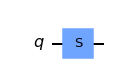

In [5]:
qc = QuantumCircuit(1)
qc.s(0)

display(qc.draw(output="mpl"))
# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

<center><b>Applying S gate on |+></b></center>
$$S\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & i \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$S\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ i\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$S\ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix}$$
<br>


In [6]:
plus_state = np.matrix([[1/sqrt(2)],[1/sqrt(2)]])
print("Initial State  is |+> i.e \n{}\n".format(plus_state))

s_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
s_gate = np.matrix(s_gate)
print(" S Gate \n{}\n".format(s_gate))

intermediate_state = s_gate*plus_state
print("intermediate State after applying S gate on intitial state  \n{}\n".format(intermediate_state))

Initial State  is |+> i.e 
[[0.70710678]
 [0.70710678]]

 S Gate 
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

intermediate State after applying S gate on intitial state  
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]




<center><b>Applying S gate on intermediate state $$\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix}$$</b></center>
$$S\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix} = \begin{bmatrix} 1 & 0   \\ 0 & i \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix}$$

$$S\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix}$$

$$S\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ i\end{bmatrix} = \ket{-}$$
<br>


In [7]:
# applying s gate on intermediate state
print("Intermediate State  \n{}\n".format(intermediate_state))

ss_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ss_gate = np.matrix(ss_gate)
print("S Gate \n{}\n".format(ss_gate))

output = ss_gate*intermediate_state
print("Output State  after applying S Gate on intermediate state is |-> \n{}\n".format(output))



Intermediate State  
[[0.70710678+0.j        ]
 [0.        +0.70710678j]]

S Gate 
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Output State  after applying S Gate on intermediate state is |-> 
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]



<center><b> Hence applying S Gate twice is same as Z Gate</b></center>
$$S\ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix} = \ket{intermediate}$$
$$S\ket{intermediate} = \ket{+}$$
<br>
<center><b>SS = S$^2$ = Z</b></center>
<br>


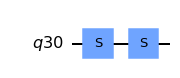

Initial State |+>  
[[0.70710678]
 [0.70710678]]

SS Gate 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]

Output State becomes |->
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]



In [8]:
#Summarised Code
q = QuantumRegister(1)
qc = QuantumCircuit(q)
qc.s(q)
qc.s(q)
display(qc.draw(output="mpl"))

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

print("Initial State |+>  \n{}\n".format(plus_state))

ss_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ss_gate = np.matrix(ss_gate)
print("SS Gate \n{}\n".format(ss_gate))

output = ss_gate*plus_state
print("Output State becomes |->\n{}\n".format(output))



### 2)  **Z = HXH**

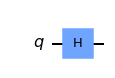

In [9]:
#creating a circuit having H gate so that qubit can undergo H gate operation when sent
qc1=QuantumCircuit(1)
qc1.h(0)
display(qc1.draw())

<center><b>Applying H gate on |0></b></center>
<br/>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$
<br/>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}= \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$
<br/>
$$H\ket{0} = \ket{+}$$


In [10]:

zero_state = np.matrix([[1.+0.j],[0.+0.j]])                            
print("initial state is |0> \n{}\n".format(zero_state))

h_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
h_gate = np.matrix(h_gate)
print(" H Gate equals \n{}\n".format(h_gate))

print("\nApplying H gate on initial state\n")
Intermediate_State1= h_gate*zero_state
print("Intermediate_State1 is  \n{}\n which is equal to |+>".format(Intermediate_State1))

initial state is |0> 
[[1.+0.j]
 [0.+0.j]]

 H Gate equals 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


Applying H gate on initial state

Intermediate_State1 is  
[[0.707+0.j]
 [0.707+0.j]]
 which is equal to |+>


<center><b>Applying  X  gate  on  Intermediate_State1  </b></center>
<br/>
$$X\ket{+} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$
<br/>
$$X\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$
<br/>
$$X\ket{+} = \ket{+}$$
<br/>

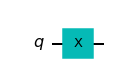

X Gate equals 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Applying x gate on Intermediate_State1 

Intermediate_State2 is 
[[0.707+0.j]
 [0.707+0.j]]
 which is |+> 


In [11]:
#creating a circuit having X gate so that qubit undergoes X gate operation when sent
qc2=QuantumCircuit(1)
qc2.x(0)
display(qc2.draw())
x_gate = b.run(transpile(qc2, b)).result().get_unitary(qc2, decimals=3)
x_gate = np.matrix(x_gate)
print("X Gate equals \n{}\n".format(x_gate))
print("Applying x gate on Intermediate_State1 \n")
Intermediate_State2=x_gate*Intermediate_State1
print("Intermediate_State2 is \n{}\n which is |+> ".format(Intermediate_State2))

<center><b>Applying H gate on Intermediate_State2</b></center>
<br/>
$$H\ket{+} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$
<br/>
$$H\ket{+} = \frac{1}{\sqrt{2}}\begin{bmatrix}  \frac{1}{\sqrt{2}}  \\ 0\end{bmatrix} = \begin{bmatrix} 1 \\ 0\end{bmatrix}$$
<br/>
$$H\ket{+} = \ket{0}$$

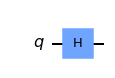

 H Gate equals 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]

Applying H gate on Intermediate_State2 

Final Output is 
[[1.+0.j]
 [0.+0.j]]
 which is equal to |0>


In [12]:
#Passing the qubit (in output state2) under H gate operation again
display(qc1.draw())

h_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
h_gate = np.matrix(h_gate)
print(" H Gate equals \n{}\n".format(h_gate))
print("Applying H gate on Intermediate_State2 \n")

final_output= h_gate*Intermediate_State2
final_output=np.round(final_output,0) #Rounding the values and assigning back to the matrix elements
print("Final Output is \n{}\n which is equal to |0>".format(final_output))

<center><b> Hence applying HXH Gate in series is same as Z Gate</b></center>
<br/>
$$H(X(H \ket{0})) = \ket{0}$$
<br>


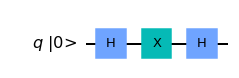

initial state is |0> 
[[1.+0.j]
 [0.+0.j]]

combined HXH Gate equals 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]

output state is |0> 
[[1.+0.j]
 [0.+0.j]]
 


In [13]:
#Summarisied code
qc=QuantumCircuit(1)
qc.h(0)
qc.x(0)
qc.h(0)
display(qc.draw(initial_state=True))


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()


zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("initial state is |0> \n{}\n".format(zero_state))

hxh_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
hxh_gate = np.matrix(hxh_gate)
print("combined HXH Gate equals \n{}\n".format(hxh_gate))

output = hxh_gate*zero_state
print("output state is |0> \n{}\n ".format(output))

### 3)  **Z=TTTT**

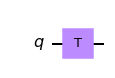

In [14]:
qc = QuantumCircuit(1)
qc.t(0)
display(qc.draw(output="mpl"))


#### Step1
<center><b>Applying T gate on intitial state i.e |+></b></center>
$$T\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$T\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ e^{\frac{i\pi}{4}}\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$T\ket{+} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}\end{bmatrix} = IntermediateState1$$


In [15]:
#Step1

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()


plus_state = np.matrix([[1/sqrt(2)],[1/sqrt(2)]])
print("Initial State  is |+> i.e \n{}\n".format(plus_state))

t_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
t_gate = np.matrix(t_gate)
print(" T Gate equals \n{}\n".format(t_gate))

print("\nApplying T gate on initial state\n \n")
Intermediate_State1= t_gate*plus_state
print("Intermediate_State1 is \n{}\n ".format(Intermediate_State1))

Initial State  is |+> i.e 
[[0.70710678]
 [0.70710678]]

 T Gate equals 
[[1.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]


Applying T gate on initial state
 

Intermediate_State1 is 
[[0.70710678+0.j        ]
 [0.49992449+0.49992449j]]
 


#### Step2
<br>
<center><b>Applying T gate on Intermediate_State1  </b></center>
<br>
$$T(IntermediateState1)=T(T\ket{+}) = \begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{4}}e^{\frac{i\pi}{4}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{2}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ e^{\frac{i\pi}{2}}\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix}$$

$$T(T\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix} = S\ket{+} = IntermediateState2$$

<br>
<center><b>Applying T Gate twice is same as S Gate</b></center>
<center><b>TT = T$^2$ = S</b></center>

In [16]:
# Step2
tt_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
tt_gate = np.matrix(tt_gate)
print(" T Gate equals \n{}\n".format(tt_gate))

print("\nApplying T gate on Intermediate_state1\n \n")
Intermediate_State2= tt_gate*Intermediate_State1         #T gate applied on intermediate_state1 to give intermediate_state2
print("Intermediate_State2 is \n{}\n ".format(Intermediate_State2))

 T Gate equals 
[[1.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]


Applying T gate on Intermediate_state1
 

Intermediate_State2 is 
[[0.70710678+0.j        ]
 [0.        +0.70689323j]]
 


#### Step3
<br>
<center><b>Applying T gate on Intermediate_State2  </b></center>
<br>
$$T(IntermediateState2)=T(T(T\ket{+})) \begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i\end{bmatrix}$$
<br/>
$$ T(T(T\ket{+}))= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ ie^{\frac{i\pi}{4}}\end{bmatrix} = IntermediateState3$$


In [17]:
#Step 3
ttt_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
ttt_gate = np.matrix(ttt_gate)
print(" T Gate equals \n{}\n".format(ttt_gate))

print("\nApplying T gate on Intermediate_state2\n \n")
Intermediate_State3= tt_gate*Intermediate_State2
print("Intermediate_State3 is \n{}\n ".format(Intermediate_State3))


 T Gate equals 
[[1.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]


Applying T gate on Intermediate_state2
 

Intermediate_State3 is 
[[ 0.70710678+0.j        ]
 [-0.49977352+0.49977352j]]
 


#### Step4
<br>
<center><b>Applying T gate on Intermediate_State3  </b></center>
<br>
$$T(IntermediateState3)=T(T(T(T\ket{+}))) \begin{bmatrix} 1 & 0   \\ 0 & e^{\frac{i\pi}{4}} \end{bmatrix}\frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ ie^{\frac{i\pi}{4}}\end{bmatrix}$$
<br/>
<br>
$$T(T(T(T\ket{+}))) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ ie^{\frac{i\pi}{4}}e^{\frac{i\pi}{4}}\end{bmatrix} = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ i^2\end{bmatrix} $$
<br/>
$$ T(T(T(T\ket{+})))= \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1\end{bmatrix}   = OutputState =\ket{-}$$


In [18]:
#Step4
tttt_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
tttt_gate = np.matrix(tttt_gate)
print(" T Gate equals \n{}\n".format(tttt_gate))

print("\nApplying T gate on Intermediate_state2\n \n")
output_State= tt_gate*Intermediate_State3
print("output_State is \n{}\n which is equal to |-> ".format(output_State))

 T Gate equals 
[[1.   +0.j    0.   +0.j   ]
 [0.   +0.j    0.707+0.707j]]


Applying T gate on Intermediate_state2
 

output_State is 
[[ 0.70710678+0.j]
 [-0.70667975+0.j]]
 which is equal to |-> 


<br>
<center><b>Hence Applying T Gate 4 times is same as Z Gate</b></center>
<center><b>TTTT = T$^4$ = SS = S$^2$ = Z</b></center>
<br>

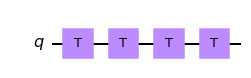

Initial State  is |+> i.e 
[[0.70710678]
 [0.70710678]]

 TTTT Gate 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]

Output State   
[[ 0.70710678+0.j]
 [-0.70710678+0.j]]
 which is equal to |->


In [19]:
#summarised code
qc = QuantumCircuit(1)
qc.t(0)
qc.t(0)
qc.t(0)
qc.t(0)
display(qc.draw(output="mpl"))


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()

plus_state = np.matrix([[1/sqrt(2)],[1/sqrt(2)]])
print("Initial State  is |+> i.e \n{}\n".format(plus_state))

tttt_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
tttt_gate = np.matrix(tttt_gate)
print(" TTTT Gate \n{}\n".format(tttt_gate))

output_state = tttt_gate*plus_state
print("Output State   \n{}\n which is equal to |->".format(output_state))

### 4)  **X=HZH**

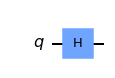

In [20]:
qc1=QuantumCircuit(1)
qc1.h(0)

display(qc1.draw())


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc1, backend)
result = job.result()



<center><b>Applying H gate on |0></b></center>
<br/>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$
<br/>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}= \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$
<br/>
$$H\ket{0} = \ket{+}= IntermediateState1$$


In [21]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])                            
print("initial state is |0> \n{}\n".format(zero_state))

h_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
h_gate = np.matrix(h_gate)
print(" H Gate equals \n{}\n".format(h_gate))

print("\nApplying H gate on initial state\n")
Intermediate_State1= h_gate*zero_state
print("Intermediate_State1 is  \n{}\n which is equal to |+>".format(Intermediate_State1))

initial state is |0> 
[[1.+0.j]
 [0.+0.j]]

 H Gate equals 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


Applying H gate on initial state

Intermediate_State1 is  
[[0.707+0.j]
 [0.707+0.j]]
 which is equal to |+>


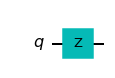

In [22]:
qc2=QuantumCircuit(1)
qc2.z(0)

display(qc2.draw())


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc2, backend)
result = job.result()


<center><b>Applying Z gate on IntermediateState1</b></center>
$$Z(IntermediateState1)=Z\ket{+} = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{+} = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$Z\ket{+} = \ket{-}$$
<br/>



In [23]:
z_gate = b.run(transpile(qc2, b)).result().get_unitary(qc2, decimals=3)
z_gate = np.matrix(z_gate)
print(" Z Gate equals \n{}\n".format(z_gate))

print("\nApplying Z gate on Intermediate_State1\n")
Intermediate_State2=z_gate*Intermediate_State1
print("Intermediate_State2 is  \n{}\n which is equal to |->".format(Intermediate_State2))

 Z Gate equals 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j]]


Applying Z gate on Intermediate_State1

Intermediate_State2 is  
[[ 0.707+0.j]
 [-0.707+0.j]]
 which is equal to |->


<center><b>Applying H gate on Intermediate_State2</b></center>
<br/>
$$H(IntermediateState2)=H\ket{-} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix}$$
<br/>
$$H\ket{-} = \frac{1}{{2}}\begin{bmatrix} 0 \\ 2\end{bmatrix}= \frac{2}{{2}}\begin{bmatrix} 0 \\ 1\end{bmatrix} =\begin{bmatrix} 0 \\ 1\end{bmatrix}$$
<br/>
$$H\ket{-} = \ket{1}= OutputState$$

In [24]:
h_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
h_gate = np.matrix(h_gate)
print(" H Gate equals \n{}\n".format(h_gate))

print("\nApplying H gate on Intermediate_State2\n")
output_State= h_gate*Intermediate_State2
output_State=np.round(output_State,0)
print("Output_State is  \n{}\n which is equal to |1>".format(output_State))

 H Gate equals 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


Applying H gate on Intermediate_State2

Output_State is  
[[0.+0.j]
 [1.+0.j]]
 which is equal to |1>



<center><b> Hence applying HZH Gate in series is same as X Gate</b></center>
<br/>
$$H(Z(H \ket{0})) = \ket{1}$$
<br>


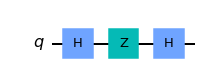

initial state is |0> 
[[1.+0.j]
 [0.+0.j]]

combined HZH Gate equals 
[[0.+0.j 1.-0.j]
 [1.-0.j 0.+0.j]]

output state is |1> 
[[0.+0.j]
 [1.+0.j]]
 


In [25]:
#summarised code
qc=QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.h(0)
display(qc.draw())


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, backend)
result = job.result()


zero_state = np.matrix([[1.+0.j],[0.+0.j]])
print("initial state is |0> \n{}\n".format(zero_state))

hzh_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
hzh_gate = np.matrix(hzh_gate)
print("combined HZH Gate equals \n{}\n".format(hzh_gate))

output = hzh_gate*zero_state
print("output state is |1> \n{}\n ".format(output))

### 5)  **X=H(SS)H**

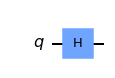

In [26]:
qc1=QuantumCircuit(1)
qc1.h(0)

display(qc1.draw())


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc1, backend)
result = job.result()


<center><b>Applying H gate on |0></b></center>
<br/>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$
<br/>
$$H\ket{0} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1\end{bmatrix}= \frac{1}{\sqrt{2}}(\begin{bmatrix} 1 \\ 0\end{bmatrix} + \begin{bmatrix} 0 \\ 1\end{bmatrix}) = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$
<br/>
$$H\ket{0} = \ket{+}= IntermediateState1$$

In [27]:
zero_state = np.matrix([[1.+0.j],[0.+0.j]])                            
print("initial state is |0> \n{}\n".format(zero_state))

h_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
h_gate = np.matrix(h_gate)
print(" H Gate equals \n{}\n".format(h_gate))

print("\nApplying H gate on initial state\n")
Intermediate_State1= h_gate*zero_state
print("Intermediate_State1 is  \n{}\n which is equal to |+>".format(Intermediate_State1))

initial state is |0> 
[[1.+0.j]
 [0.+0.j]]

 H Gate equals 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


Applying H gate on initial state

Intermediate_State1 is  
[[0.707+0.j]
 [0.707+0.j]]
 which is equal to |+>


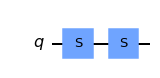

In [28]:
qc2=QuantumCircuit(1)
qc2.s(0)
qc2.s(0)
display(qc2.draw())


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc2, backend)
result = job.result()


<center><b>Applying S gate twice on Intermediate State1</b></center>

$$S(S(intermediate State1))=S(S\ket{+}) = \begin{bmatrix} 1 & 0   \\ 0 & -1 \end{bmatrix}\begin{bmatrix} \frac{1}{\sqrt{2}} \\ \frac{1}{\sqrt{2}}\end{bmatrix}$$

$$S(S\ket{+}) = \begin{bmatrix} \frac{1}{\sqrt{2}} \\ -\frac{1}{\sqrt{2}}\end{bmatrix}$$

$$S(S\ket{+}) = \frac{1}{\sqrt{2}} \begin{bmatrix} 1 \\ -1\end{bmatrix}  $$
<br/>
$$S(S\ket{+})  = \ket{-} $$
<br/>
$$= Intermediate State2$$
<br>

In [29]:
ss_gate = b.run(transpile(qc2, b)).result().get_unitary(qc2, decimals=3)
ss_gate = np.matrix(ss_gate)
print("Combined SS Gate \n{}\n".format(ss_gate))
print("\nApplying SS gate on Intermediate_State1\n\n")
Intermediate_State2= ss_gate*Intermediate_State1
print("Intermediate State2\n{}\n which is |->".format(Intermediate_State2))

Combined SS Gate 
[[ 1.+0.j  0.+0.j]
 [ 0.+0.j -1.-0.j]]


Applying SS gate on Intermediate_State1


Intermediate State2
[[ 0.707+0.j]
 [-0.707+0.j]]
 which is |->


<center><b>Applying H gate on Intermediate_State2</b></center>
<br/>
$$H(IntermediateState2)=H\ket{-} = \frac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1   \\ 1 & -1 \end{bmatrix}\frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ -1\end{bmatrix}$$
<br/>
$$H\ket{-} = \frac{1}{{2}}\begin{bmatrix} 0 \\ 2\end{bmatrix}= \frac{2}{{2}}\begin{bmatrix} 0 \\ 1\end{bmatrix} =\begin{bmatrix} 0 \\ 1\end{bmatrix}$$
<br/>
$$H\ket{-} = \ket{1}= OutputState$$

In [30]:
h_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
h_gate = np.matrix(h_gate)
print(" H Gate equals \n{}\n".format(h_gate))

print("\nApplying H gate on Intermediate_State2\n")
Output_state= h_gate*Intermediate_State2
Output_state=np.round(Output_state)
print("Output State is  \n{}\n which is equal to |1>".format(Output_state))

 H Gate equals 
[[ 0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j]]


Applying H gate on Intermediate_State2

Output State is  
[[0.+0.j]
 [1.+0.j]]
 which is equal to |1>


<center><b> Hence applying H(SS)H Gate in series is same as X Gate</b></center>
<br/>
$$H(S(S((H \ket{0})))) = \ket{1}$$
<br>



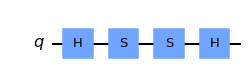

initial state is |0> 
[[1.+0.j]
 [0.+0.j]]

 H(SS)H Gate equals 
[[0.+0.j 1.-0.j]
 [1.-0.j 0.+0.j]]


Applying H(SS)H gate on initial state

Output is  
[[0.+0.j]
 [1.+0.j]]
 which is equal to |1>


In [31]:
#summarised code
qc1=QuantumCircuit(1)
qc1.h(0)
qc1.s(0)
qc1.s(0)
qc1.h(0)
display(qc1.draw())


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc1, backend)
result = job.result()


zero_state = np.matrix([[1.+0.j],[0.+0.j]])                            
print("initial state is |0> \n{}\n".format(zero_state))

hssh_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
hssh_gate = np.matrix(hssh_gate)
print(" H(SS)H Gate equals \n{}\n".format(hssh_gate))

print("\nApplying H(SS)H gate on initial state\n")
output_state= hssh_gate*zero_state
print("Output is  \n{}\n which is equal to |1>".format(output_state))

### 6)  **Y=SXS$^{\dagger}$**

<Left>Example</Left>
<br>
$$Y\ket{0} = i\ket{1}$$

$$S(X(S'(\ket{+}))) = i\ket{1}$$
<br>
<Left>$ S^{\dagger}$ **Gate**</Left>
<Left>Also known as the Sdg or S-dagger gate.</Left>
<center><b>$ S^{\dagger}$ is Hermitian Conjugate (inverse) of S <b><center>
 <br>
<center><b>$$As \,\, we \,\,know\, \, S^{\dagger} = u1(\pi/2)=P(-\pi/2)$$<b><center>
<br>
$$S^{\dagger} =\begin{bmatrix} 1 & 0   \\ 0 & -i \end{bmatrix}$$
<br>    

<left>Step 1<left>
<center><b>Applying Sdg gate on |0> where $\theta$ = $-\pi/2$</b></center>
<br>
$$Sdg\ket{0} = \begin{bmatrix} 1 & 0   \\ 0 & -i \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$
<br>
$$Sdg\ket{0} = \begin{bmatrix}1 \\ 0\end{bmatrix} =\ket{0}= Intermediate\,State1$$


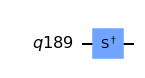

Initial State  is |0> i.e 
[[1.+0.j]
 [0.+0.j]]

S' Gate equals 
[[1.+0.j 0.+0.j]
 [0.+0.j 0.-1.j]]

Applying S' gate on Intermediate_State2 

intermediate State1 after applying S gate on intitial state  
[[1.+0.j]
 [0.+0.j]]
 which is |0>


In [32]:
#Step 1
q=QuantumRegister(1)
qc1=QuantumCircuit(q)
qc1.sdg(q) #qc1.p(-pi/2,0) or  qc.u1(-pi/2, 0)
display(qc1.draw())

# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc1, backend)
result = job.result()
s_gate_HermitianConjugate= b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
s_gate_HermitianConjugate = np.matrix(s_gate_HermitianConjugate)


zero_state = np.matrix([[1.+0.j],[0.+0.j]])       
print("Initial State  is |0> i.e \n{}\n".format(zero_state))

print("S' Gate equals \n{}\n".format(s_gate_HermitianConjugate))
print("Applying S' gate on Intermediate_State2 \n")


intermediate_state1 = s_gate_HermitianConjugate*zero_state
print("intermediate State1 after applying S gate on intitial state  \n{}\n which is |0>".format(intermediate_state1))



<left>Step 2<left>
<center><b>Applying  X  gate  on  Intermediate_State1  </b></center>
<br/>
$$X\ket{0} = \begin{bmatrix} 0 & 1   \\ 1 & 0 \end{bmatrix}\begin{bmatrix} 1 \\ 0\end{bmatrix}$$
<br/>
$$X\ket{0} = \begin{bmatrix} 0 \\1\end{bmatrix}=\ket{1}=Intermediate\,State2$$
<br/>

    

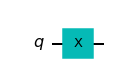

X Gate equals 
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]

Applying x gate on Intermediate_State1 

Intermediate_State2 is 
[[0.+0.j]
 [1.+0.j]]
 which is |1> 


In [33]:
#step 2
#creating a circuit having X gate so that qubit undergoes X gate operation when sent
qc2=QuantumCircuit(1)
qc2.x(0)
display(qc2.draw())
x_gate = b.run(transpile(qc2, b)).result().get_unitary(qc2, decimals=3)
x_gate = np.matrix(x_gate)
print("X Gate equals \n{}\n".format(x_gate))
print("Applying x gate on Intermediate_State1 \n")
Intermediate_State2=x_gate*intermediate_state1
print("Intermediate_State2 is \n{}\n which is |1> ".format(Intermediate_State2))

<left>Step 3<left>
<center><b>Applying S gate on Intermediate_State2 </b></center>
<br/>
$$S\ket{1} = \begin{bmatrix} 1 & 0   \\ 0 & i \end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix}$$
<br/>
$$S\ket{1} =\begin{bmatrix}  0  \\ i\end{bmatrix} $$
<br/>
$$S\ket{1}  = i\ket{1}$$

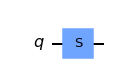

 S Gate 
[[1.+0.j 0.+0.j]
 [0.+0.j 0.+1.j]]

Output State   
[[0.+0.j]
 [0.+1.j]]
 which is equal to  i|1>


In [34]:
#step3
qc3 = QuantumCircuit(1)
qc3.s(0)

display(qc3.draw(output="mpl"))
  
s_hermitianConjugate_gate = b.run(transpile(qc3, b)).result().get_unitary(qc3, decimals=2)
s_hermitianConjugate_gate = np.matrix(s_hermitianConjugate_gate)
print(" S Gate \n{}\n".format(s_hermitianConjugate_gate))

output_state = s_gate*Intermediate_State2
print("Output State   \n{}\n which is equal to  i|1>".format(output_state ))




<center><b> Hence Y = SXS$^{\dagger}$</b></center>
<br/>


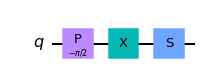

Initial State  is |0> i.e 
[[1.+0.j]
 [0.+0.j]]

 Sxs' Gate 
[[ 0.+0.j -0.-1.j]
 [ 0.+1.j  0.+0.j]]

output State after applying SXS' gate on intitial state  
[[0.+0.j]
 [0.+1.j]]
 which is i|1>


In [36]:
#summarised code
qc1 = QuantumCircuit(1)
qc1.p(-pi/2,0)
qc1.x(0)
qc1.s(0)


display(qc1.draw(output="mpl"))


# executing the circuit
backend = Aer.get_backend('statevector_simulator')
b = BasicAer.get_backend('unitary_simulator')
job = execute(qc1, backend)
result = job.result()

zero_state =  np.matrix([[1+0.j],[0+0.j]])   
print("Initial State  is |0> i.e \n{}\n".format(zero_state))

sxs_gate = b.run(transpile(qc1, b)).result().get_unitary(qc1, decimals=3)
sxs_gate = np.matrix(sxs_gate)
print(" Sxs' Gate \n{}\n".format(sxs_gate))

output_state1 = sxs_gate*zero_state
print("output State after applying SXS' gate on intitial state  \n{}\n which is i|1>".format(output_state1))
